🧠 Loading model from: food_classifier_final_model.keras
🏷️ Loading class labels from: class_indices.json
✅ Model and labels loaded successfully!
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 1s/step
Prediction: 'naan-butter_naan' (66.56% confidence)


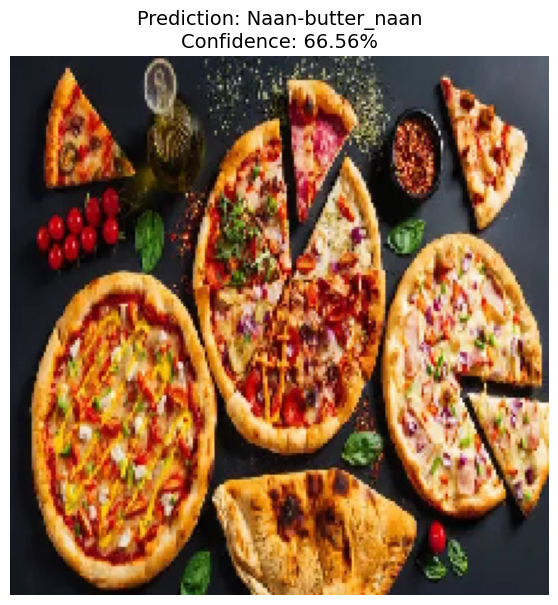

In [5]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import tkinter as tk
from tkinter import filedialog
import json
from tensorflow.keras.preprocessing import image

## --- Configuration ---
# The names of the files you have saved
MODEL_PATH = 'food_classifier_final_model.keras'
CLASS_INDICES_PATH = 'class_indices.json'

# This MUST be the same image size you used for training
IMAGE_SIZE = (224, 224)

def predict_and_display_image():
    """
    Loads the model and labels, asks for an image,
    and displays the prediction.
    """
    # --- 1. Load the Model and Labels ---
    try:
        print(f"🧠 Loading model from: {MODEL_PATH}")
        model = tf.keras.models.load_model(MODEL_PATH)
        
        print(f"🏷️ Loading class labels from: {CLASS_INDICES_PATH}")
        with open(CLASS_INDICES_PATH, 'r') as f:
            class_indices = json.load(f)
            
        # Flip the dictionary to map index back to class name {0: 'biriyani'}
        labels = {v: k for k, v in class_indices.items()}
        print("✅ Model and labels loaded successfully!")
        
    except Exception as e:
        print(f"❌ ERROR: Could not load files. Make sure '{MODEL_PATH}' and '{CLASS_INDICES_PATH}' are in the correct folder.")
        print(f"Error details: {e}")
        return

    # --- 2. Select an Image ---
    root = tk.Tk()
    root.withdraw() # Hide the main Tkinter window
    file_path = filedialog.askopenfilename(
        title="Select an image for prediction",
        filetypes=[("Image Files", "*.jpg *.jpeg *.png")]
    )
    
    if not file_path:
        print("No image selected.")
        return

    # --- 3. Preprocess the Image ---
    # Load the image and resize it
    img = image.load_img(file_path, target_size=IMAGE_SIZE)
    # Convert image to a numpy array
    img_array = image.img_to_array(img)
    # Add a batch dimension -> shape becomes (1, 224, 224, 3)
    img_batch = np.expand_dims(img_array, axis=0)
    # Use the same preprocessing function as in your training script
    img_preprocessed = tf.keras.applications.efficientnet_v2.preprocess_input(img_batch)

    # --- 4. Make a Prediction ---
    prediction = model.predict(img_preprocessed)
    predicted_index = np.argmax(prediction[0])
    predicted_class_name = labels[predicted_index]
    confidence = np.max(prediction[0]) * 100

    print(f"Prediction: '{predicted_class_name}' ({confidence:.2f}% confidence)")

    # --- 5. Display the Result ---
    plt.figure(figsize=(7, 7))
    plt.imshow(img) # Show the original, clean image
    plt.title(f"Prediction: {predicted_class_name.capitalize()}\nConfidence: {confidence:.2f}%", size=14)
    plt.axis('off')
    plt.show()

# --- Main execution block ---
if __name__ == "__main__":
    predict_and_display_image()